## Part 1: Data Loading and Basic Python Operations

### Import necessary libraries

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Load the dataset
file_path = 'Churn_Modelling.csv'  # Replace with the actual file path
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Dataset Preview:")
print(df.head())

Dataset Preview:
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [20]:
df['CustomerId'].nunique()

10000

Drop Multi-Cardinal Columns

In [21]:
df.drop(columns=['CustomerId','Surname','RowNumber'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


Text(0, 0.5, 'Frequency')

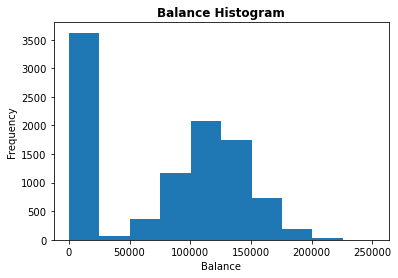

In [28]:
plt.hist(df['Balance'])
plt.title('Balance Histogram').set_fontweight('bold')
plt.xlabel('Balance')
plt.ylabel('Frequency')

Text(0.5, 0, 'Balance')

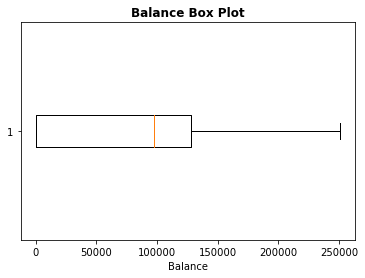

In [31]:
plt.boxplot(df['Balance'], vert=False)
plt.title('Balance Box Plot').set_fontweight('bold')
plt.xlabel('Balance')

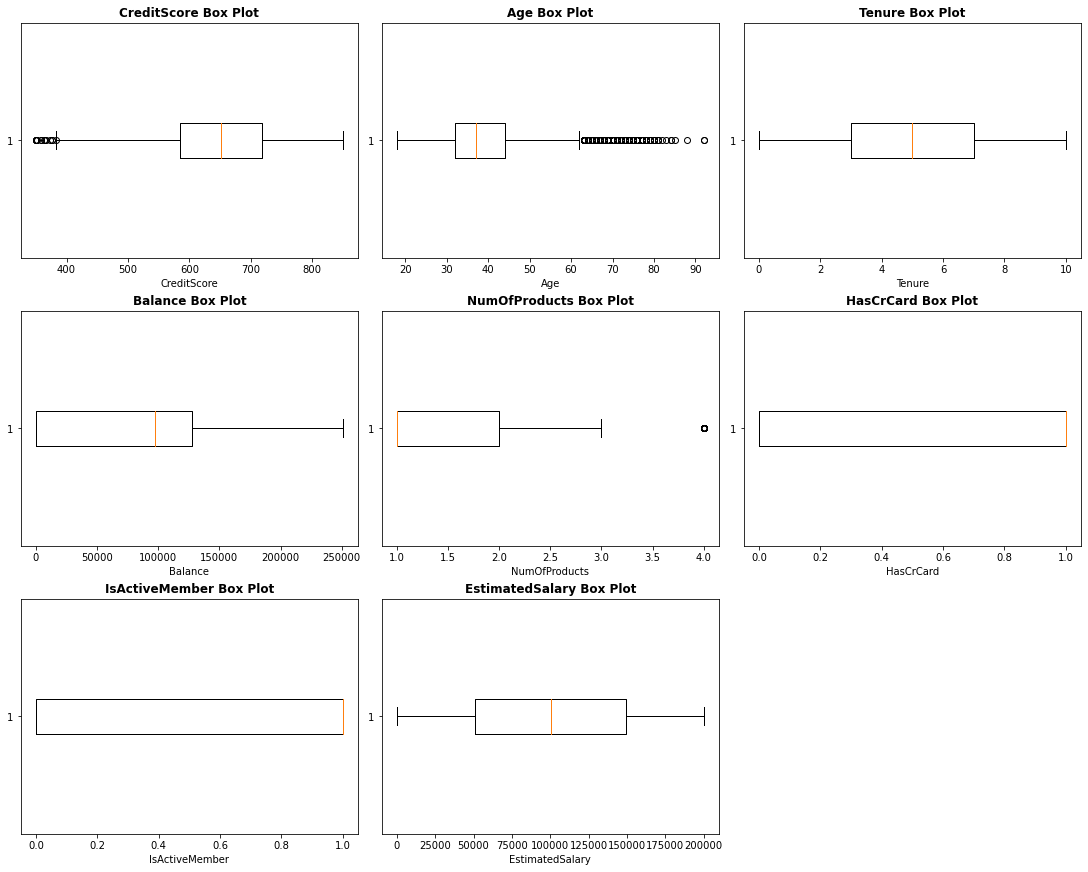

In [39]:
# Assuming df is your DataFrame
numeric_columns = [col for col in df.columns if col != 'Exited' and pd.api.types.is_numeric_dtype(df[col])]

# Number of rows and columns for the grid
n_cols = 3  # Number of columns in the grid
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols  # Calculate required rows dynamically

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4), constrained_layout=True)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot box plots for each numeric column
for idx, col in enumerate(numeric_columns):
    axes[idx].boxplot(df[col].dropna(), vert=False)  # Horizontal box plot
    axes[idx].set_title(f'{col} Box Plot', fontweight='bold')
    axes[idx].set_xlabel(col)

# Hide any unused subplots
for idx in range(len(numeric_columns), len(axes)):
    axes[idx].axis('off')

plt.show()



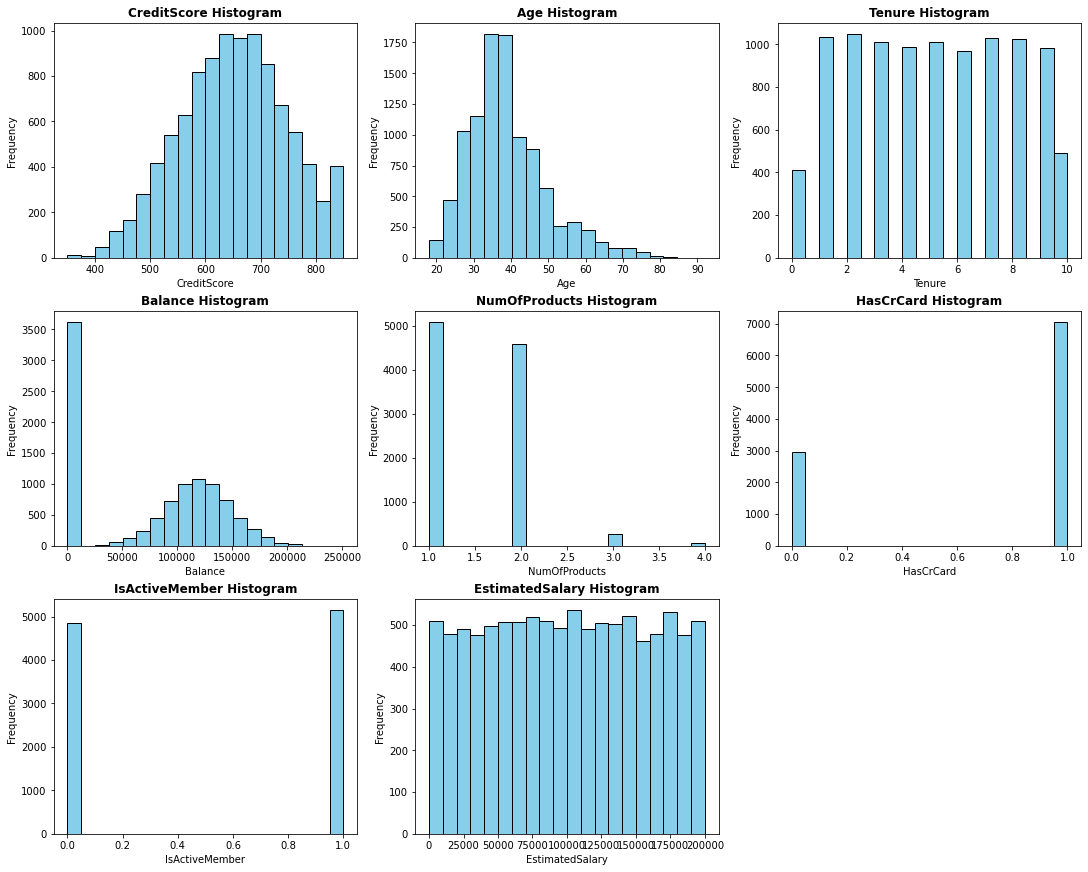

In [41]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame
numeric_columns = [col for col in df.columns if col != 'Exited' and pd.api.types.is_numeric_dtype(df[col])]

# Number of rows and columns for the grid
n_cols = 3  # Number of columns in the grid
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols  # Calculate required rows dynamically

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4), constrained_layout=True)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot histograms for each numeric column
for idx, col in enumerate(numeric_columns):
    axes[idx].hist(df[col].dropna(), bins=20, color='skyblue', edgecolor='black')  # Histogram with 20 bins
    axes[idx].set_title(f'{col} Histogram', fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')

# Hide any unused subplots
for idx in range(len(numeric_columns), len(axes)):
    axes[idx].axis('off')

plt.show()

In [42]:
# Define function to calculate average balance for different age groups
def calculate_age_group_balance(df):
    # Create a new column for age groups
    df['age_group'] = None
    for idx in df.index:
        age = df.loc[idx, 'age']
        if age < 30:
            df.loc[idx, 'age_group'] = 'Young'
        elif age < 50:
            df.loc[idx, 'age_group'] = 'Middle-aged'
        else:
            df.loc[idx, 'age_group'] = 'Senior'
    
    # Calculate average balance per age group
    return df.groupby('age_group')['balance'].mean()

# Calculate average balance for age groups
average_balance_by_age_group = calculate_age_group_balance(df)
print("\nAverage Balance by Age Group:")
print(average_balance_by_age_group)

# Define function to count customers by country
def count_customers_by_country(df):
    country_counts = df['country'].value_counts().to_dict()
    return country_counts

# Count customers by country
customers_by_country = count_customers_by_country(df)
print("\nCustomer Count by Country:")
print(customers_by_country)

KeyError: 'age'